In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mp1
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten

Using TensorFlow backend.


## Simple Classification

### Entraînement avec l'optimiseur sgd

Définition du modèle

Le modèle obtenue dépendait beaucoup de l'initialisation. J'ai obtenue une bonne performance la plupart du temps avec une initialisation RandomUniform sur $[-2,2]$

In [2]:
model = Sequential()
model.add(Dense(output_dim=3,activation='softmax',kernel_initializer=init.RandomUniform(minval=-2,maxval=2)))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

C:\Users\Thibault\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3, kernel_initializer=<keras.ini...)`
  


Dataset d'entraînement

In [ ]:
[X_train, Y_train] = mp1.generate_dataset_classification(300, 20)
Y_train = to_categorical(Y_train)

Fit

In [4]:
model.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 6.3554 - acc: 0.5800
Epoch 2/100
300/300 [==============================] - 0s 156us/step - loss: 6.3023 - acc: 0.5767
Epoch 3/100
300/300 [==============================] - 0s 104us/step - loss: 6.2509 - acc: 0.5633
Epoch 4/100
300/300 [==============================] - 0s 208us/step - loss: 6.2581 - acc: 0.5667
Epoch 5/100
300/300 [==============================] - 0s 156us/step - loss: 6.1614 - acc: 0.5800
Epoch 6/100
300/300 [==============================] - 0s 208us/step - loss: 6.1478 - acc: 0.5900
Epoch 7/100
300/300 [==============================] - 0s 104us/step - loss: 6.1543 - acc: 0.5733
Epoch 8/100
300/300 [==============================] - 0s 208us/step - loss: 6.1463 - acc: 0.5367
Epoch 9/100
300/300 [==============================] - 0s 104us/step - loss: 6.0142 - acc: 0.5900
Epoch 10/100
300/300 [==============================] - 0s 260us/step - loss: 6.0888 - acc: 0.5667
Epoch 11/100
300/300 

### Entrainement avec l'optimiseur Adam

In [5]:
model = Sequential()
model.add(Dense(output_dim=3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\Thibault\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3)`
  


In [7]:
model.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
300/300 [==============================] - 0s 156us/step - loss: 0.0079 - acc: 1.0000
Epoch 2/100
300/300 [==============================] - 0s 208us/step - loss: 0.0075 - acc: 1.0000
Epoch 3/100
300/300 [==============================] - 0s 260us/step - loss: 0.0073 - acc: 1.0000
Epoch 4/100
300/300 [==============================] - 0s 313us/step - loss: 0.0072 - acc: 1.0000
Epoch 5/100
300/300 [==============================] - 0s 208us/step - loss: 0.0071 - acc: 1.0000
Epoch 6/100
300/300 [==============================] - 0s 208us/step - loss: 0.0071 - acc: 1.0000
Epoch 7/100
300/300 [==============================] - 0s 156us/step - loss: 0.0072 - acc: 1.0000
Epoch 8/100
300/300 [==============================] - 0s 156us/step - loss: 0.0075 - acc: 1.0000
Epoch 9/100
300/300 [==============================] - 0s 104us/step - loss: 0.0070 - acc: 1.0000
Epoch 10/100
300/300 [==============================] - 0s 156us/step - loss: 0.0069 - acc: 1.0000
Epoch 11/100
300/30

L'optimiseur Adam semble converger plus vite que sgd avec les setting par défault. De plus, l'initialiseur par défaut permet d'obtenir la plupart du temps un bon résultat alors que le résultat était très dépendant de l'initialisation avec un optimiseur sgd

### Test

In [ ]:
[X_test, Y_test] = mp1.generate_dataset_classification(300, 20)
Y_test = to_categorical(Y_test)

In [9]:
model.evaluate(X_test,Y_test)

300/300 [==============================] - 0s 260us/step


[0.003693565578820805, 1.0]

### Visualisation

In [10]:
weights = model.get_weights()[0]

In [11]:
im_rectangle = weights[:,0].reshape(72,72)
im_disk = weights[:,1].reshape(72,72)
im_triangle = weights[:,2].reshape(72,72)

Text(0.5,1,'neurone triangles')

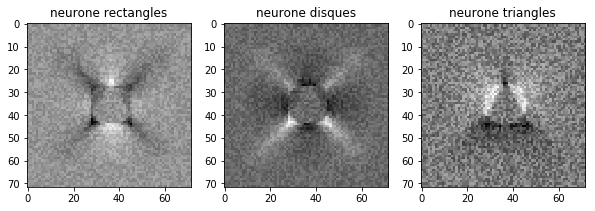

In [12]:
f , axes = plt.subplots(1,3,figsize=(10,10))
axes[0].imshow(im_rectangle,cmap='gray')
axes[0].set_title('neurone rectangles')
axes[1].imshow(im_disk,cmap='gray')
axes[1].set_title('neurone disques')
axes[2].imshow(im_triangle,cmap='gray')
axes[2].set_title('neurone triangles')

## Classification avec changement de position et dimension

### Classifieur linéaire précedent

In [18]:
model = Sequential()
model.add(Dense(output_dim=3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\Thibault\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3, activation="softmax")`
  


Training Dataset

In [20]:
[X_train, Y_train] = mp1.generate_dataset_classification(400, 20,True)
Y_train = to_categorical(Y_train)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390


In [22]:
model.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
400/400 [==============================] - 0s 156us/step - loss: 0.6820 - acc: 0.6550
Epoch 2/100
400/400 [==============================] - 0s 114us/step - loss: 0.6752 - acc: 0.6725
Epoch 3/100
400/400 [==============================] - 0s 232us/step - loss: 0.5853 - acc: 0.6950
Epoch 4/100
400/400 [==============================] - 0s 234us/step - loss: 0.5581 - acc: 0.7475
Epoch 5/100
400/400 [==============================] - 0s 190us/step - loss: 0.6583 - acc: 0.6950
Epoch 6/100
400/400 [==============================] - 0s 206us/step - loss: 0.7086 - acc: 0.6625
Epoch 7/100
400/400 [==============================] - 0s 172us/step - loss: 0.5996 - acc: 0.7000
Epoch 8/100
400/400 [==============================] - 0s 134us/step - loss: 0.8147 - acc: 0.6400
Epoch 9/100
400/400 [==============================] - 0s 228us/step - loss: 0.6564 - acc: 0.6700
Epoch 10/100
400/400 [==============================] - 0s 193us/step - loss: 0.5829 - acc: 0.7325
Epoch 11/100
400/40

400/400 [==============================] - 0s 191us/step - loss: 0.4585 - acc: 0.7800
Epoch 84/100
400/400 [==============================] - 0s 254us/step - loss: 0.5473 - acc: 0.7300
Epoch 85/100
400/400 [==============================] - 0s 222us/step - loss: 0.4881 - acc: 0.7575
Epoch 86/100
400/400 [==============================] - 0s 209us/step - loss: 0.3594 - acc: 0.8525
Epoch 87/100
400/400 [==============================] - 0s 224us/step - loss: 0.3700 - acc: 0.8400
Epoch 88/100
400/400 [==============================] - 0s 233us/step - loss: 0.4792 - acc: 0.7825
Epoch 89/100
400/400 [==============================] - 0s 263us/step - loss: 0.4116 - acc: 0.7975
Epoch 90/100
400/400 [==============================] - 0s 258us/step - loss: 0.3434 - acc: 0.8925
Epoch 91/100
400/400 [==============================] - 0s 244us/step - loss: 0.3828 - acc: 0.8525
Epoch 92/100
400/400 [==============================] - 0s 385us/step - loss: 0.4339 - acc: 0.7925
Epoch 93/100
400/400 [=

Test

In [24]:
[X_test, Y_test] = mp1.generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [25]:
model.evaluate(X_test,Y_test)

300/300 [==============================] - 0s 371us/step


[0.9300148272514344, 0.6333333341280619]

On n'arrive pas à obtenir la précision obtenue dans le cas précedent avec un classifieur linéaire

### Modèle convolutionnel

Modèle:
 - Une couche Conv2D(16, (5,5))
 - Une couche Dense(3)

In [36]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(16,(5,5),activation='relu',input_shape=(72,72,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
[X_train, Y_train] = mp1.generate_dataset_classification(2000, 20,True)
Y_train = to_categorical(Y_train)
X_train = X_train.reshape(-1,72,72,1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990


In [44]:
model.fit(X_train,Y_train,batch_size=32,epochs=30)

Epoch 1/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.2794 - acc: 0.9040
Epoch 2/30
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1759 - acc: 0.9455
Epoch 3/30
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1397 - acc: 0.9580
Epoch 4/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0976 - acc: 0.9710
Epoch 5/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0789 - acc: 0.9820
Epoch 6/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0677 - acc: 0.9875
Epoch 7/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0611 - acc: 0.9890
Epoch 8/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0501 - acc: 0.9930
Epoch 9/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0412 - acc: 0.9950
Epoch 10/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0380 - acc: 0.9940
Epoch 11/30
2000/2000 [======

### Test

In [34]:
[X_test, Y_test] = mp1.generate_test_set_classification()
X_test = X_test.reshape(-1,72,72,1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [45]:
model.evaluate(X_test,Y_test)

300/300 [==============================] - 1s 2ms/step


[0.2379630345106125, 0.946666665871938]

Avec un CNN, on obtient une précision de 0.95 en test

## Problème de régression

De la manière dont le training set est généré, un triangle peut avoir différents labels (en permutant les sommets). On défini une transformation des labels pour n'avoir un encodage unique par triangle.
Pour cela, on ordonne les trois sommets du triangle en mettant d'abord le point (x,y) de y minimal, puis parmis les deux point restant on met d'abord celui ayant le x minimal

In [3]:
def arange_labels(labels):
    n=labels.shape[0]
    res=np.zeros(labels.shape)
    Xs=labels[:,[0,2,4]]
    Ys=labels[:,[1,3,5]]
    
    first_vertice = np.argmin(Ys,axis=1)
    res[:,0]=Xs[np.arange(n),first_vertice]
    res[:,1]=Ys[np.arange(n),first_vertice]
    # Le premier sommet (x,y) est celui ayant le y le plus bas
    
    
    index_row=np.repeat(np.arange(n),2,axis=0).reshape(n,2)
    index_col=np.array([[x for x in set(range(3))-set([first_vertice[i]])] for i in range(n)])
    remaining_Xs=Xs[index_row,index_col]
    remaining_Ys=Ys[index_row,index_col]
    #Il s'agit des deux sommets qui n'ont pas encore été sélectionnés
    second_vertice=np.zeros((n,))
    for i in range(n):
        index_first=first_vertice[i]
        line=Xs[i,:]
        L=[]
        for k in range(3):
            if k!=index_first:
                L.append(k)
        possible=line[L]
        second_vertice[i]=np.argwhere(line==min(possible))
        
        
    res[:,2]=Xs[np.arange(n),second_vertice.astype(int)]
    res[:,3]=Ys[np.arange(n),second_vertice.astype(int)]
    # Le deuxième sommet ajouté est celui qui a le plus petit x parmi les deux restant
    
    index_row=np.arange(n).reshape(n,1)
    index_col=np.array([[x for x in set(range(3))-set([first_vertice[i],second_vertice[i]])] for i in range(n)])
    for i in range(n):
        for k in range(3):
            if k!=first_vertice[i]&k!=second_vertice[i]:
                index_col[i,0]=k
    last_X=Xs[index_row,index_col]
    last_Y=Ys[index_row,index_col]
    
    res[:,4]=last_X.reshape(-1,)
    res[:,5]=last_Y.reshape(-1,)
    
    return res

In [17]:
model = Sequential()
model.add(Conv2D(16,(5,5),activation='relu',input_shape=(72,72,1)))
model.add(Flatten())
model.add(Dense(6,activation='sigmoid'))

model.compile(loss='mean_squared_error',optimizer='adam')

In [5]:
X_train, Y_train =mp1.generate_dataset_regression(2000,20)
X_train = X_train.reshape(-1,72,72,1)
Y_train = arange_labels(Y_train)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990


In [ ]:
model.fit(X_train,Y_train,batch_size=32,epochs=30)

Epoch 1/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.1041
Epoch 2/30
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0269
Epoch 3/30
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0200
Epoch 4/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0160
Epoch 5/30
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0133
Epoch 6/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0111
Epoch 7/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0094
Epoch 8/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0081
Epoch 9/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0067
Epoch 10/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0058
Epoch 11/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0049
Epoch 12/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0043
E

In [9]:
X_test, Y_test = mp1.generate_test_set_regression()
X_test = X_test.reshape(-1,72,72,1)
Y_test = arange_labels(Y_test)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [10]:
Y_pred = model.predict(X_test)

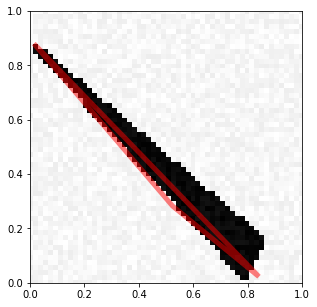

In [16]:
i=8
mp1.visualize_prediction(X_test[i], Y_pred[i])

### Image Denoising

On réecrit les fonctions generate_a_ pour obtenir une image bruité et non bruité.
L'amplitude du bruit est tiré au hasard sur $[0,lim]$ pour chaque image, où lim est une limite définit en génerant le dataset

In [13]:
def generate_a_rectangle_denoising(noise_limit):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    corners = np.random.random(4)
    top = max(corners[0], corners[1])
    bottom = min(corners[0], corners[1])
    left = min(corners[2], corners[3])
    right = max(corners[2], corners[3])    
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    
    noise_amplitude = noise_limit * np.random.rand()
    noisy_image = mp1.generate_a_drawing(figsize, U, V, noise_amplitude)
    clean_image = mp1.generate_a_drawing(figsize, U, V)
    
    return {'noisy':noisy_image,'clean':clean_image}

def generate_a_disk_denoising(noise_limit):
    figsize = 1.0
    center = np.random.random(2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
        
    noise_amplitude = noise_limit * np.random.rand()
    noisy_image = mp1.generate_a_drawing(figsize, U, V, noise_amplitude)
    clean_image = mp1.generate_a_drawing(figsize, U, V)
    
    return {'noisy':noisy_image,'clean':clean_image}

def generate_a_triangle_denoising(noise_limit):
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    
    noise_amplitude = noise_limit * np.random.rand()
    noisy_image = mp1.generate_a_drawing(figsize, U, V, noise_amplitude)
    clean_image = mp1.generate_a_drawing(figsize, U, V)
    
    return {'noisy':noisy_image,'clean':clean_image}



def generate_dataset_denoising(nb_samples, noise_limit):
    # Getting im_size:
    im_size = mp1.generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            sample = generate_a_rectangle_denoising(noise_limit)
        elif category == 1: 
            sample = generate_a_disk_denoising(noise_limit)
        else:
            sample = generate_a_triangle_denoising(noise_limit)
        noisy = sample['noisy']
        clean = sample['clean']
        noisy = (noisy + noise_limit) / (255 + 2 * noise_limit)
        clean = (clean + noise_limit) / (255 + 2* noise_limit)
        X[i] = noisy
        Y[i] = clean
    
    return [X,Y]

Le réseau utilisé est un U-net avec 2 étapes de pooling et symétriquement, deux étapes d'upsampling. Les nombres de filtres lors de la descente sont 32, 64 puis 128.
Le padding est utilisé à chaque convolution.

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Input, UpSampling2D, concatenate
from keras.models import Model

input_img = Input(shape=(72,72,1))

down_1 = Conv2D(32,(3,3),padding='same',activation='relu')(input_img)
down_1 = Conv2D(32,(3,3),padding='same',activation='relu')(down_1)

down_1_pool = MaxPooling2D(padding='same')(down_1)
down_2 = Conv2D(64,(3,3),padding='same',activation='relu')(down_1_pool)
down_2 = Conv2D(64,(3,3),padding='same',activation='relu')(down_2)

down_2_pool = MaxPooling2D(padding='same')(down_2)
center_1 = Conv2D(128,(3,3),padding='same',activation='relu')(down_2_pool)
center_1 = Conv2D(128,(3,3),padding='same',activation='relu')(center_1)

up_2_upsample = Conv2D(64,(2,2),padding='same',activation='relu')(UpSampling2D(size=(2,2))(center_1))
merge_2 = concatenate([down_2,up_2_upsample],axis=3)
up_2 = Conv2D(64,(3,3),padding='same',activation='relu')(merge_2)
up_2 = Conv2D(64,(3,3),padding='same',activation='relu')(up_2)

up_1_upsample = Conv2D(32,(2,2),padding='same',activation='relu')(UpSampling2D(size=(2,2))(up_2))
merge_1 = concatenate([down_1,up_1_upsample],axis=3)
up_1 = Conv2D(32,(3,3),padding='same',activation='relu')(merge_1)
up_1 = Conv2D(32,(3,3),padding='same',activation='relu')(up_1)

output_img = Conv2D(1,(1,1),activation='sigmoid')(up_1)

model = Model(inputs=input_img, outputs=output_img)
model.compile(optimizer='adam',loss='mean_squared_error')

On génère un data_set de 2000 images sur lesquels on entraine le modèle

In [14]:
dataset = generate_dataset_denoising(2000,20)
X_train, Y_train = dataset[0], dataset[1]
X_train = X_train.reshape(-1,72,72,1)
Y_train = Y_train.reshape(-1,72,72,1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990


In [15]:
model.fit(X_train,Y_train,batch_size=64,epochs=10)

Epoch 1/10
2000/2000 [==============================] - 241s 120ms/step - loss: 0.0703
Epoch 2/10
2000/2000 [==============================] - 232s 116ms/step - loss: 0.0378
Epoch 3/10
2000/2000 [==============================] - 239s 119ms/step - loss: 0.0166
Epoch 4/10
2000/2000 [==============================] - 221s 110ms/step - loss: 0.0078
Epoch 5/10
2000/2000 [==============================] - 217s 108ms/step - loss: 0.0046
Epoch 6/10
2000/2000 [==============================] - 248s 124ms/step - loss: 0.0033
Epoch 7/10
2000/2000 [==============================] - 253s 126ms/step - loss: 0.0025
Epoch 8/10
2000/2000 [==============================] - 262s 131ms/step - loss: 0.0020
Epoch 9/10
2000/2000 [==============================] - 255s 127ms/step - loss: 0.0014
Epoch 10/10
2000/2000 [==============================] - 264s 132ms/step - loss: 0.0011


On génère ensuite un dataset de test pour visualiser les résultats

In [27]:
dataset = generate_dataset_denoising(10,20)
X_test = dataset[0]
Y_test = dataset[1]
X_test = X_test.reshape(-1,72,72,1)

Creating data:
0


In [28]:
Y_pred = model.predict(X_test)

Text(0.5, 1.0, 'prediction on third sample')

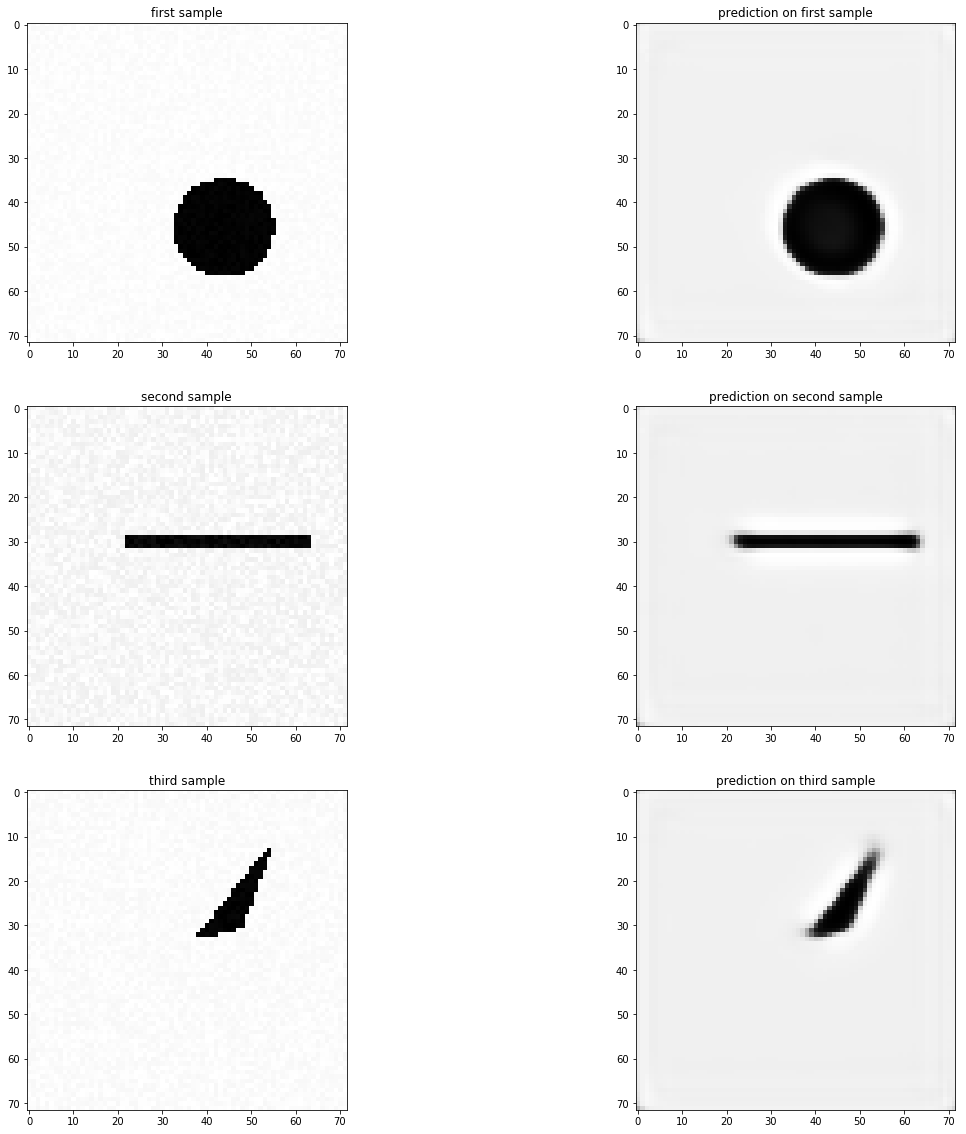

In [29]:
f, axes = plt.subplots(3,2,figsize=(20,20))
axes[0,0].imshow(X_test[0,:,:,:].reshape(72,72),cmap='gray')
axes[0,0].set_title('first sample')
axes[0,1].imshow(Y_pred[0,:,:,:].reshape(72,72),cmap='gray')
axes[0,1].set_title('prediction on first sample')
axes[1,0].imshow(X_test[1,:,:,:].reshape(72,72),cmap='gray')
axes[1,0].set_title('second sample')
axes[1,1].imshow(Y_pred[1,:,:,:].reshape(72,72),cmap='gray')
axes[1,1].set_title('prediction on second sample')
axes[2,0].imshow(X_test[2,:,:,:].reshape(72,72),cmap='gray')
axes[2,0].set_title('third sample')
axes[2,1].imshow(Y_pred[2,:,:,:].reshape(72,72),cmap='gray')
axes[2,1].set_title('prediction on third sample')